### Generalized additive model

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import itertools
from itertools import combinations
from scipy import spatial
import pickle as pickle
import gudhi
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
import warnings

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Import the dataset

In [33]:
washingtonDcSviRaw = gpd.read_file('./data/processed data/SVI2020 WashingtonDC counties with death rate/SVI2020_WashingtonDC_counties_with_death_rate.shp')

In [34]:
# reaname od_deaths_ column to deaths_rate
washingtonDcSviRaw = washingtonDcSviRaw.rename(columns={'od_deaths_':'death_rate'})

##### Filtering the raw variables with overdose death rate

In [35]:
selectedVariables = ['EP_POV150','EP_UNEMP','EP_HBURD','EP_NOHSDP','EP_UNINSUR','EP_AGE65','EP_AGE17','EP_DISABL','EP_SNGPNT','EP_LIMENG','EP_MINRTY','EP_MUNIT','EP_MOBILE','EP_CROWD','EP_NOVEH','EP_GROUPQ','death_rate']

In [36]:
selectedVariablesWithoutY = ['EP_POV150','EP_UNEMP','EP_HBURD','EP_NOHSDP','EP_UNINSUR','EP_AGE65','EP_AGE17','EP_DISABL','EP_SNGPNT','EP_LIMENG','EP_MINRTY','EP_MUNIT','EP_MOBILE','EP_CROWD','EP_NOVEH','EP_GROUPQ']

In [37]:
# filter metro_svi_deaths dataframe to include only the selected variables and od_deaths_per_1000
metroSviMultipleVariablesDf = washingtonDcSviRaw[selectedVariables]

In [38]:
metroSviMultipleVariablesDf.head(3)

,EP_POV150,EP_UNEMP,EP_HBURD,EP_NOHSDP,EP_UNINSUR,EP_AGE65,EP_AGE17,EP_DISABL,EP_SNGPNT,EP_LIMENG,EP_MINRTY,EP_MUNIT,EP_MOBILE,EP_CROWD,EP_NOVEH,EP_GROUPQ,death_rate
0,21.3,7.1,27.2,8.1,3.7,12.2,18.0,11.4,6.9,2.4,63.3,46.8,0.1,3.6,35.4,5.6,0.615407
1,8.0,3.8,19.0,5.7,3.3,14.9,23.2,9.9,4.6,0.3,22.4,3.7,0.9,0.5,2.8,0.6,0.358330
2,10.9,4.4,21.8,6.4,4.2,12.5,24.0,9.9,8.2,1.0,61.7,5.8,0.9,1.8,3.2,1.3,0.371637


In [39]:
#define predictor and response variables
X = metroSviMultipleVariablesDf.drop('death_rate', axis=1)
y = metroSviMultipleVariablesDf['death_rate']

In [40]:
type(X)

pandas.core.frame.DataFrame

In [41]:
from pygam import LinearGAM

In [42]:
gam = LinearGAM(n_splines=10).gridsearch(X.values, y.values)

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:04
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:04
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:01
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:01
 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00
 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00
 81% (9 of 11) |####################     | Elapsed Time: 0:00:01 ETA:   0:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:01 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


In [43]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     24.9481
Link Function:                     IdentityLink Log Likelihood:                                  -378.0957
Number of Samples:                           25 AIC:                                              808.0877
                                                AICc:                                              90.2126
                                                GCV:                                                   0.0
                                                Scale:                                                 0.0
                                                Pseudo R-Squared:                                      1.0
Feature Function                  Lam

/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_93484/3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


TypeError: GAM.partial_dependence() got an unexpected keyword argument 'feature'

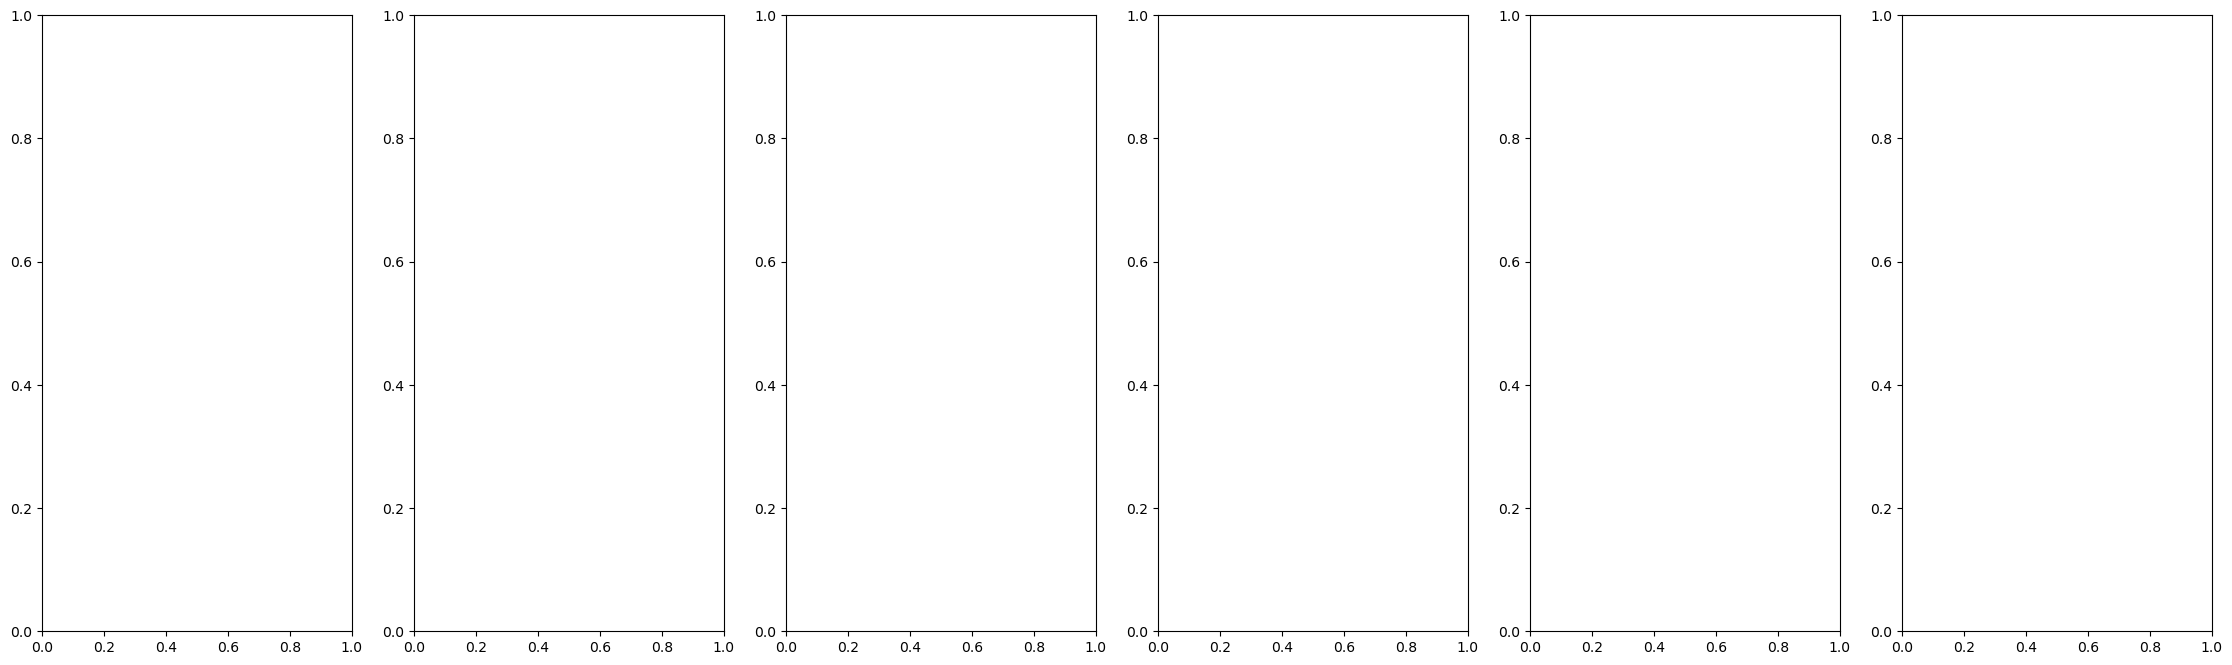

In [50]:
XX = gam.generate_X_grid(term=0)
plt.rcParams['figure.figsize'] = (28, 8)
fig, axs = plt.subplots(1, len(X.columns.values[0:6]))
titles = X.columns.values
for i, ax in enumerate(axs):
    pdep, confi = gam.partial_dependence(XX, feature=i+1, width=.95)
    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi[0][:, 0], c='grey', ls='--')
    ax.plot(XX[:, i], confi[0][:, 1], c='grey', ls='--')
    ax.set_title(titles[i],fontsize=26)
plt.show()

In [45]:
X.columns.values

array(['EP_POV150', 'EP_UNEMP', 'EP_HBURD', 'EP_NOHSDP', 'EP_UNINSUR',
       'EP_AGE65', 'EP_AGE17', 'EP_DISABL', 'EP_SNGPNT', 'EP_LIMENG',
       'EP_MINRTY', 'EP_MUNIT', 'EP_MOBILE', 'EP_CROWD', 'EP_NOVEH',
       'EP_GROUPQ'], dtype=object)